# Evaluation of transport models

This example shows how to evaluate functions of the [Extended Gaussian Disorder Model](https://doi.org/10.1103/PhysRevB.78.085207) without running device simulation.

Below, $\hat{\sigma}$ denotes normalized Gaussian disorder $\frac{\sigma}{k T}$. $c$ denotes relative charge carrier concentration $\frac{N}{N_0}$.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from oedes.functions import egdm
from scipy.optimize import brentq
from oedes import *

## Enhancement factor of mobility depending on charge carrier concentration $g_1$

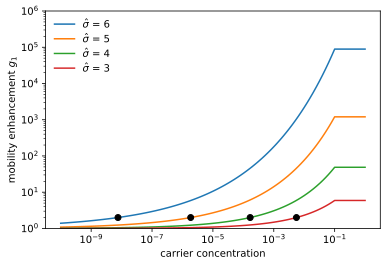

In [2]:
c = 10**np.linspace(-10, 0., 101)
for nsigma in [3, 4, 5, 6][::-1]:
    g1 = egdm.g1(nsigma, np.where(c < egdm.g1_max_c, c, egdm.g1_max_c))
    plt.plot(c, g1, label='$\hat{\sigma}$ = %s'%nsigma)
    testing.store(g1, rtol=1e-7)
    # solve for g1(x)=2
    c2 = brentq(lambda x: egdm.g1(nsigma, x) - 2., 1e-10, 1e1)
    plt.plot(c2, 2, 'o', color='black')
plt.yscale('log')
plt.xscale('log')
plt.ylim([1., 1e6])
plt.xlabel('carrier concentration')
plt.ylabel('mobility enhancement $g_1$')
plt.legend(loc=0, frameon=False);

## Enhancement factor of mobility depending on electric field $g_2$

In [3]:
En = np.linspace(0., 2.5, 101)

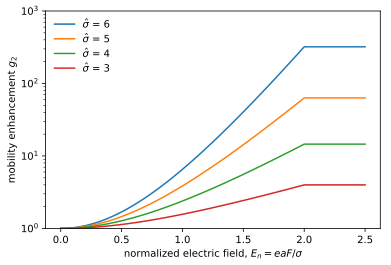

In [4]:
for nsigma in [3, 4, 5, 6][::-1]:
    g2 = egdm.g2(nsigma, np.where(En < egdm.g2_max_En, En, egdm.g2_max_En))
    testing.store(g2, rtol=1e-7)
    plt.plot(En, g2, label='$\hat{\sigma}$ = %s'%nsigma)
plt.yscale('log')
plt.ylim([1., 1e3])
plt.xlabel('normalized electric field, $E_n=eaF/\sigma$')
plt.ylabel('mobility enhancement $g_2$')
plt.legend(loc=0, frameon=False);

## Enhancement factor of diffusion $g_3$

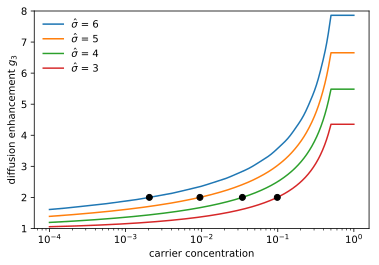

In [5]:
c = 10**np.linspace(-4, 0., 1001)
for nsigma in [3, 4, 5, 6][::-1]:
    g3 = egdm.g3(nsigma, np.where(c < egdm.g3_max_c, c, egdm.g3_max_c))
    plt.plot(c, g3, label='$\hat{\sigma}$ = %s'%nsigma)
    testing.store(g3, rtol=1e-7)
    # solve for g3(x)=2
    c2 = brentq(lambda x: egdm.g3(nsigma, x) - 2., 1e-4, 0.5)
    plt.plot(c2, 2, 'o', color='black')
plt.xscale('log')
plt.ylim([1., 8.])
plt.xlabel('carrier concentration')
plt.ylabel('diffusion enhancement $g_3$')
plt.legend(loc=0, frameon=False);

### Reference

S. L. M. van Mensfoort and R. Coehoorn [Effect of Gaussian disorder on the voltage dependence of the current density in sandwich-type devices based on organic semiconductors](https://doi.org/10.1103/PhysRevB.78.085207), Phys Rev B 78, 085207 (2008)


---
This file is a part of __oedes__, an open source organic electronic device 
simulator. For more information, see <https://www.github.com/mzszym/oedes>.
